In [1]:
# import modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image

# Download data

In [2]:
!pip install pycocotools

In [3]:
!pip install fiftyone

  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
INFO: pip is looking at multiple versions of motor to determine which version is compatible with other requirements. This could take a while.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.4/10.4 MB 40.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 108.9/108.9 kB 7.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.1/98.1 kB 7.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.7/61.7 kB 4.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 5.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 74.7/74.7 kB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 43.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.3/73.3 kB 5.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 943.1/943.1 kB 36.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━

In [4]:
import os

# Local path in Colab
save_dir = '/content/raw_images'
os.makedirs(save_dir, exist_ok=True)  # Create the folder if it doesn't exist

In [5]:
from pycocotools.coco import COCO
import fiftyone
import fiftyone.zoo

In [6]:
dataset = fiftyone.zoo.load_zoo_dataset(
    "coco-2017",
    split="train",
    label_types=[],
    classes=["person"],
    max_samples=5000,
)

INFO:fiftyone.zoo.datasets:Downloading split 'train' to '/root/fiftyone/coco-2017/train' if necessary


INFO:fiftyone.utils.coco:Downloading annotations to '/root/fiftyone/coco-2017/tmp-download/annotations_trainval2017.zip'


 100% |██████|    1.9Gb/1.9Gb [7.7s elapsed, 0s remaining, 276.8Mb/s]      


INFO:eta.core.utils: 100% |██████|    1.9Gb/1.9Gb [7.7s elapsed, 0s remaining, 276.8Mb/s]      


Extracting annotations to '/root/fiftyone/coco-2017/raw/instances_train2017.json'


INFO:fiftyone.utils.coco:Extracting annotations to '/root/fiftyone/coco-2017/raw/instances_train2017.json'


INFO:fiftyone.utils.coco:Downloading 5000 images


 100% |████████████████| 5000/5000 [22.7m elapsed, 0s remaining, 3.5 images/s]      


INFO:eta.core.utils: 100% |████████████████| 5000/5000 [22.7m elapsed, 0s remaining, 3.5 images/s]      


Writing annotations for 5000 downloaded samples to '/root/fiftyone/coco-2017/train/labels.json'


INFO:fiftyone.utils.coco:Writing annotations for 5000 downloaded samples to '/root/fiftyone/coco-2017/train/labels.json'


Dataset info written to '/root/fiftyone/coco-2017/info.json'


INFO:fiftyone.zoo.datasets:Dataset info written to '/root/fiftyone/coco-2017/info.json'


Loading 'coco-2017' split 'train'


INFO:fiftyone.zoo.datasets:Loading 'coco-2017' split 'train'


 100% |███████████████| 5000/5000 [2.3s elapsed, 0s remaining, 2.2K samples/s]      


INFO:eta.core.utils: 100% |███████████████| 5000/5000 [2.3s elapsed, 0s remaining, 2.2K samples/s]      


Dataset 'coco-2017-train-5000' created


INFO:fiftyone.zoo.datasets:Dataset 'coco-2017-train-5000' created


In [7]:
print(type(dataset))

<class 'fiftyone.core.dataset.Dataset'>


In [8]:
# Save the dataset loaded in a folder
for sample in dataset:
    # Get the image file path
    image_path = sample.filepath
    # Open and save the image in the target folder
    img = Image.open(image_path)
    save_path = os.path.join(save_dir, os.path.basename(image_path))
    img.save(save_path)

In [11]:
# Launch the app if wanna visually check the data
#session = fiftyone.launch_app(dataset)

In [9]:
# Helper function to visualize n images
def visualize_n_images(n, dataset):
  for i, sample in zip(range(n), dataset):
      image = Image.open(sample.filepath).convert("RGB")
      # Plot the image
      ax = plt.subplot(3, 5, i + 1)
      ax.imshow(image)
      ax.axis("off")
  plt.show()

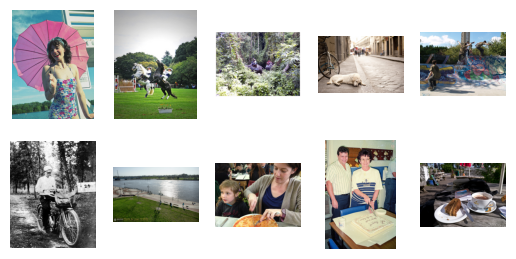

In [10]:
visualize_n_images(10, dataset)

# Change data format

In [11]:
from torch.utils.data import IterableDataset
from torchvision import transforms

# Use an iterable dataset to save RAM
class ImageIterableTensor(IterableDataset):
    def __init__(self, image_dir, transform=None):
        super().__init__()
        self.image_dir = image_dir
        self.image_files = sorted(os.listdir(image_dir))  # Get list of image files
        self.transform = transform

    def __iter__(self):
        for image_file in self.image_files:
            image_path = os.path.join(self.image_dir, image_file)
            filename = os.path.splitext(image_file)[0]
            image = Image.open(image_path).convert("RGB")

            if self.transform:
                image = self.transform(image)

            yield image, filename  # Yield the image instead of returning it

class ImageIterableDataset(IterableDataset):
    def __init__(self, image_dir, transform=None):
        super().__init__()
        self.image_dir = image_dir
        self.image_files = sorted(os.listdir(image_dir))  # Get list of image files
        self.transform = transform

    def __iter__(self):
        for image_file in self.image_files:
            image_path = os.path.join(self.image_dir, image_file)
            filename = os.path.splitext(image_file)[0]
            image = Image.open(image_path)

            if self.transform:
                image = self.transform(image)

            yield image, filename  # Yield the image instead of returning it

In [12]:
# Define transformations
# If wanna keep images as Image, only resizing them
transform_to_image = transforms.Compose([
  transforms.Resize((256, 256))])

transform_to_tensor = transforms.Compose([
    transforms.Resize((256, 256)),
    transforms.ToTensor(),
    # Note: Normalize disabled before data augmentation
    #transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

normalize_transform = transforms.Compose([
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

# Call the previous methods to get iterable datasets
dataset_images = ImageIterableDataset(image_dir="/content/raw_images/", transform=transform_to_image)

In [13]:
dataset_tensors = ImageIterableTensor(image_dir="/content/raw_images/", transform=transform_to_tensor)

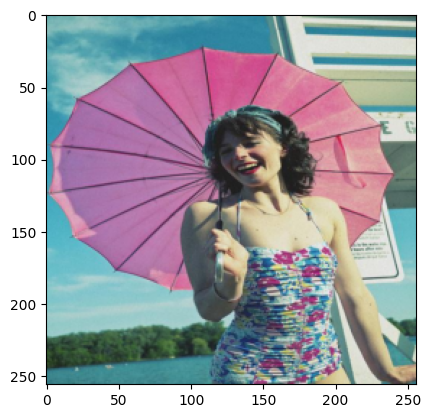

<class 'PIL.Image.Image'>
000000000036


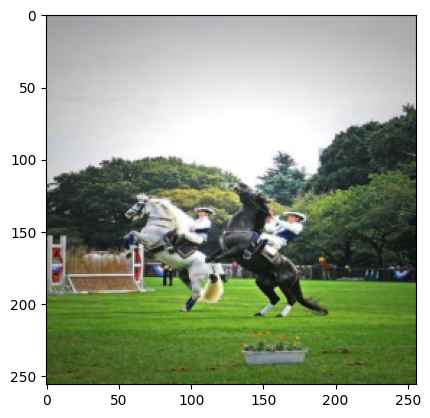

<class 'PIL.Image.Image'>
000000000049


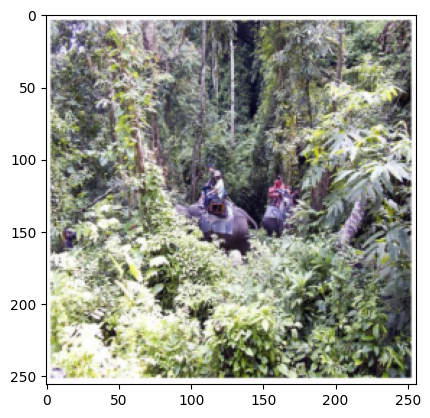

<class 'PIL.Image.Image'>
000000000061


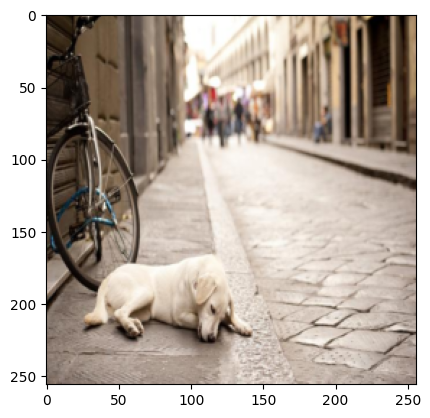

<class 'PIL.Image.Image'>
000000000074


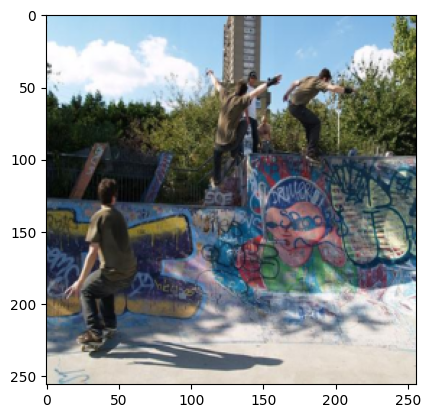

<class 'PIL.Image.Image'>
000000000077


In [20]:
# Verify that the iterable datasets work as expected for images
for i, (sample, filename) in zip(range(5), dataset_images):
    plt.imshow(sample)
    plt.show()
    print(type(sample))
    print(filename)

In [15]:
# Verify that the iterable datasets work as expected for tensors
for i, (sample, filename) in zip(range(5), dataset_tensors):
    print(sample.shape)
    print(filename)

torch.Size([3, 256, 256])
000000000036
torch.Size([3, 256, 256])
000000000049
torch.Size([3, 256, 256])
000000000061
torch.Size([3, 256, 256])
000000000074
torch.Size([3, 256, 256])
000000000077


# Data augmentation

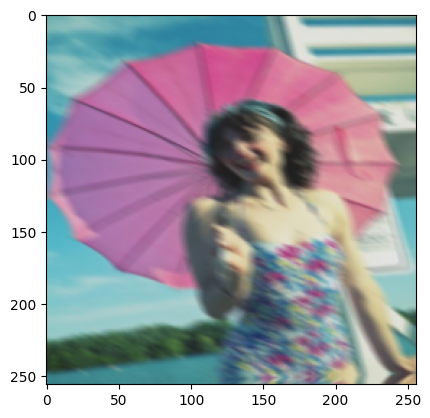

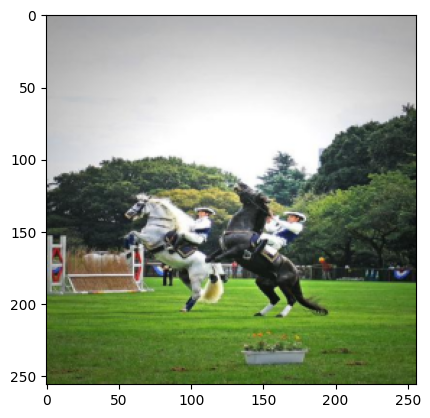

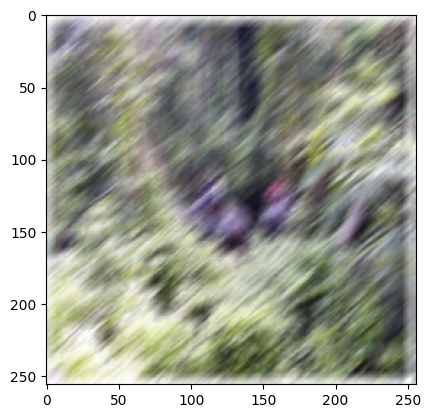

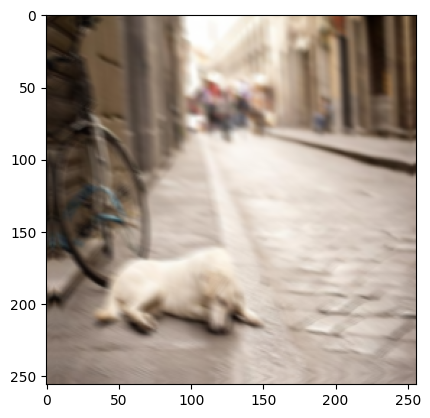

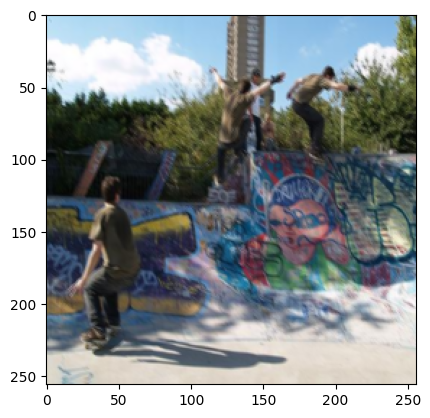

In [19]:
from albumentations import Compose, MotionBlur, ShiftScaleRotate, GaussianBlur

# Try augmenting
shake = Compose([
    MotionBlur(p=0.9, blur_limit=15),
    ShiftScaleRotate(shift_limit=0.02, scale_limit=0.02, rotate_limit=5, p=0.5),
    #GaussianBlur(blur_limit=5, p=0.9)
])
for i, (sample, filename) in zip(range(5), dataset_tensors):
    image_np = sample.numpy().transpose((1, 2, 0))
    augmented_image = shake(image=image_np)['image']
    plt.imshow(augmented_image)
    plt.show()

In [23]:
import torch
# Now augment and save the augmented data
def get_augmented_pairs(dataset_tensor):
  '''
  This is for input type as a tensor.
  '''
  for (image_tensor, filename) in dataset_tensor:
    image_np = image_tensor.numpy().transpose((1, 2, 0))
    augmented_image_np = shake(image=image_np)['image']
    augmented_tensor = torch.from_numpy(augmented_image_np.transpose((2, 0, 1)))
    yield (image_tensor, augmented_tensor), filename

In [24]:
augmented_pairs = get_augmented_pairs(dataset_tensors)

torch.Size([3, 256, 256])
torch.Size([3, 256, 256])
000000000127


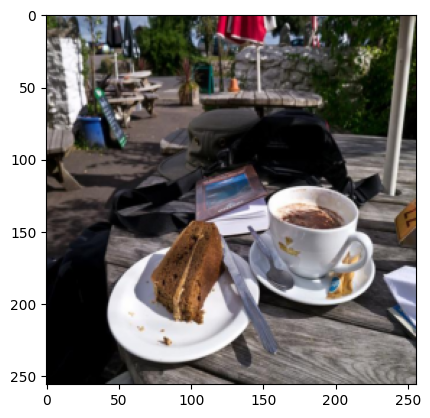

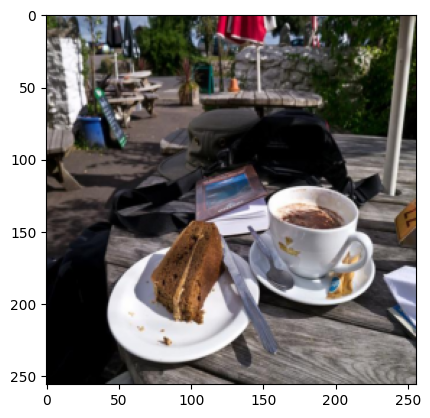

torch.Size([3, 256, 256])
torch.Size([3, 256, 256])
000000000136


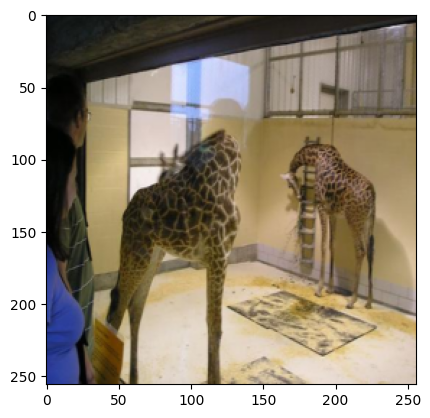

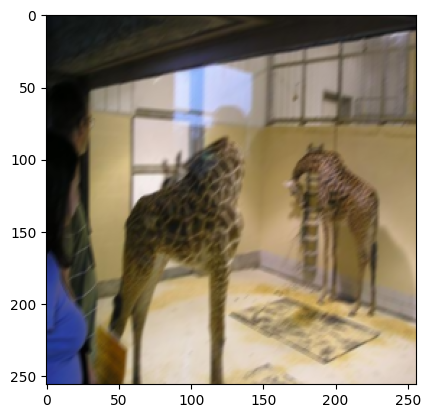

torch.Size([3, 256, 256])
torch.Size([3, 256, 256])
000000000149


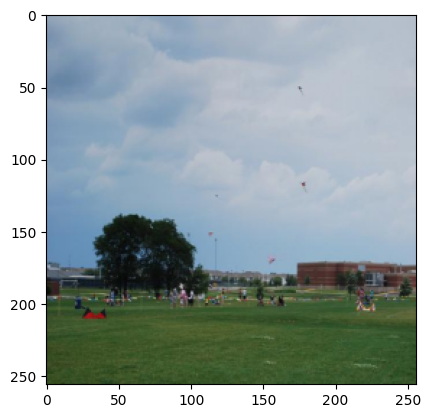

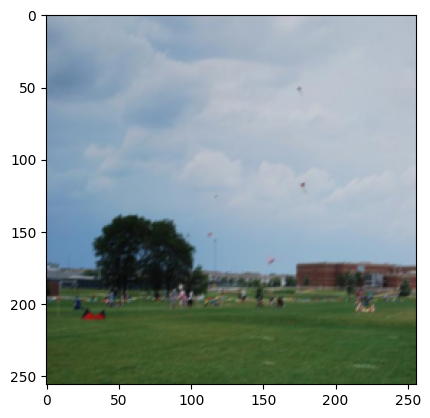

torch.Size([3, 256, 256])
torch.Size([3, 256, 256])
000000000151


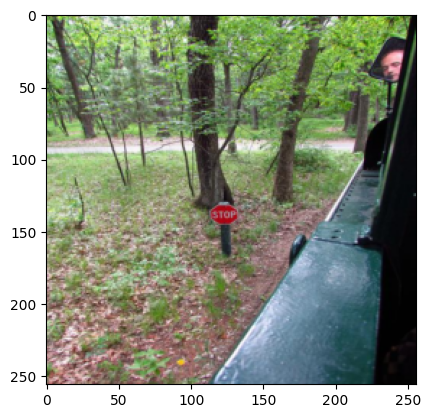

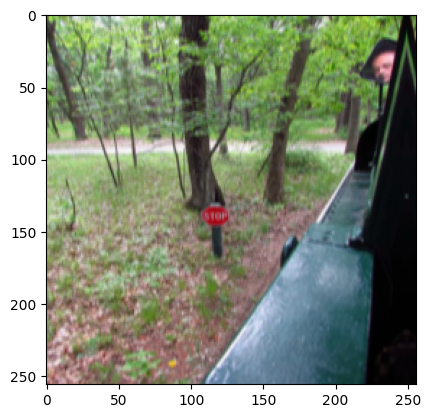

torch.Size([3, 256, 256])
torch.Size([3, 256, 256])
000000000165


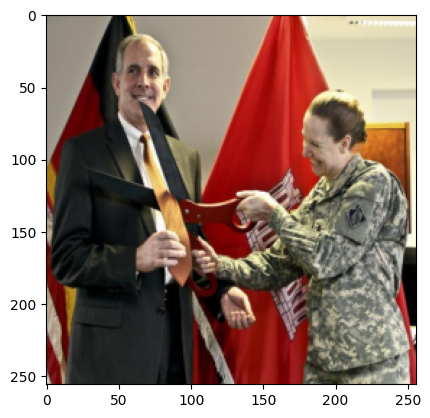

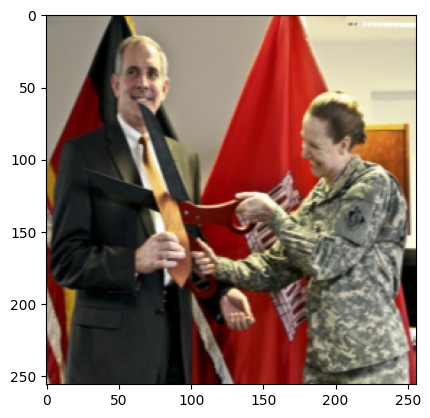

In [31]:
# Verify that the augmentation function is working as expected
for i, ((image_tensor, augmented_tensor), filename) in zip(range(5), augmented_pairs):
  print(image_tensor.shape)
  print(augmented_tensor.shape)
  print(filename)
  plt.imshow(image_tensor.numpy().transpose((1, 2, 0)))
  plt.show()
  plt.imshow(augmented_tensor.numpy().transpose((1, 2, 0)))
  plt.show()

In [32]:
def get_augmented_pairs_image(dataset_image):
  '''
  This is for input type as images.
  '''
  for (image, filename) in dataset_image:
    image_tensor = transform_to_tensor(image)
    image_np = image_tensor.numpy().transpose((1, 2, 0))
    augmented_image_np = shake(image=image_np)['image']
    augmented_tensor = torch.from_numpy(augmented_image_np.transpose((2, 0, 1)))
    yield (image_tensor, augmented_tensor), filename

In [33]:
augmented_pairs_image = get_augmented_pairs_image(dataset_images)

torch.Size([3, 256, 256])
torch.Size([3, 256, 256])
000000000036


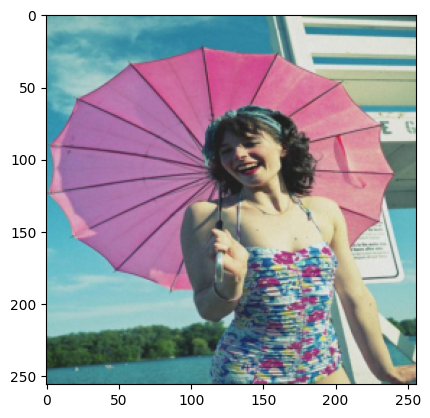

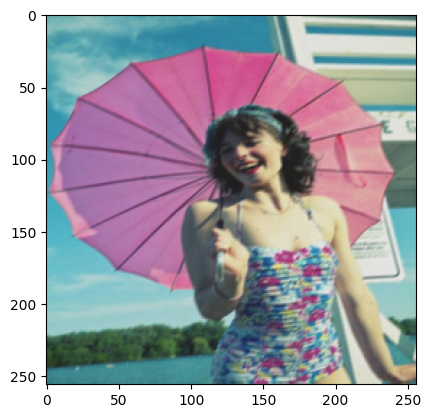

torch.Size([3, 256, 256])
torch.Size([3, 256, 256])
000000000049


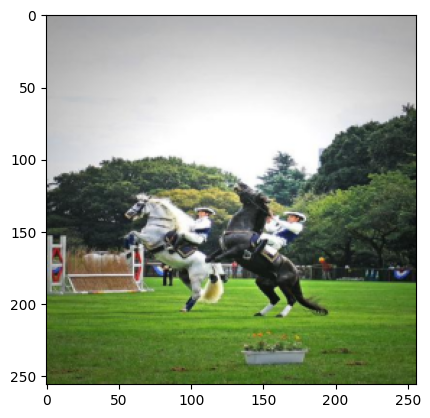

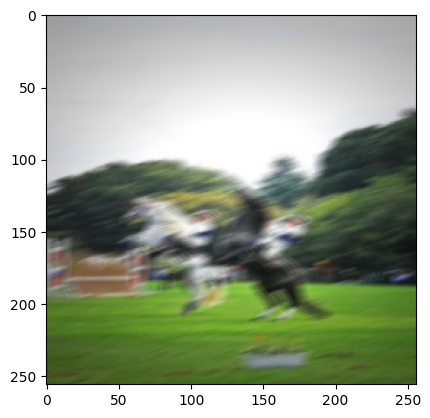

torch.Size([3, 256, 256])
torch.Size([3, 256, 256])
000000000061


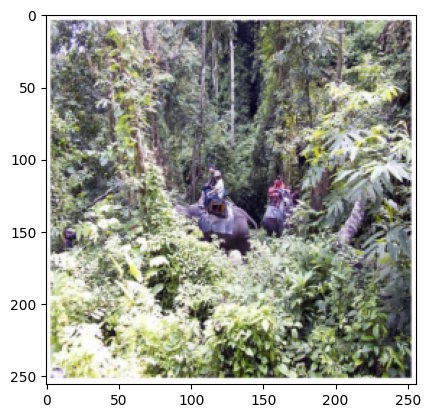

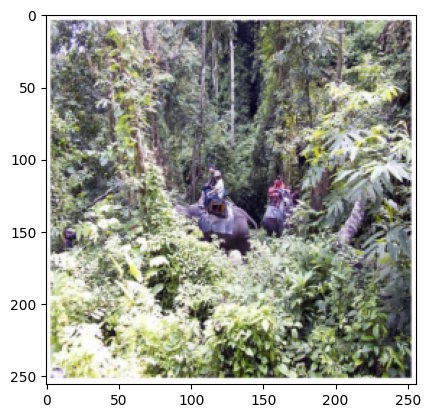

torch.Size([3, 256, 256])
torch.Size([3, 256, 256])
000000000074


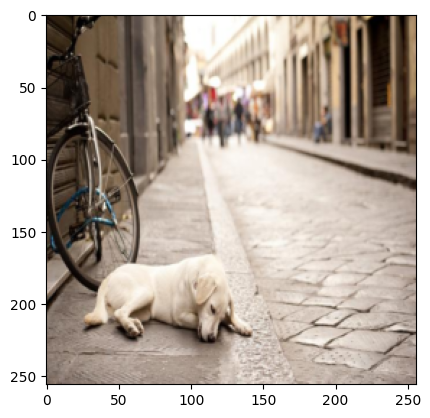

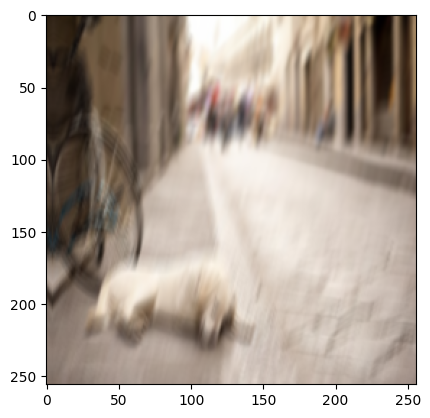

torch.Size([3, 256, 256])
torch.Size([3, 256, 256])
000000000077


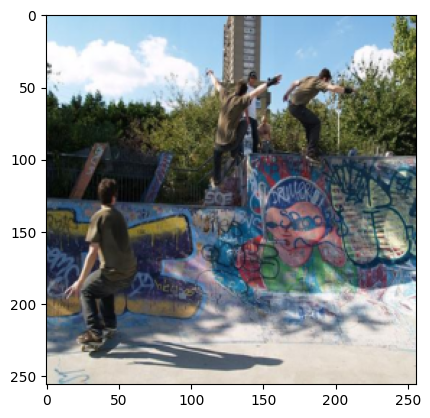

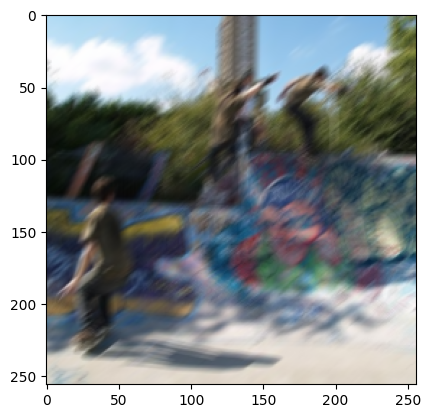

In [34]:
# Verify that the augmentation function is working as expected
for i, ((image_tensor, augmented_tensor), filename) in zip(range(5), augmented_pairs_image):
  print(image_tensor.shape)
  print(augmented_tensor.shape)
  print(filename)
  plt.imshow(image_tensor.numpy().transpose((1, 2, 0)))
  plt.show()
  plt.imshow(augmented_tensor.numpy().transpose((1, 2, 0)))
  plt.show()